# Тестовое задание Маховера Антона на позицию разработичк DWH

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

# для встроенных картинок

%matplotlib inline
# чуть покрасивше картинки:
figsize(15, 5)


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=14)

# http://stackoverflow.com/questions/33995707/attributeerror-unknown-property-color-cycle
matplotlib.style.use('ggplot')

from matplotlib import rc
 
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

print ("Pandas version " + pd.__version__)
print ("Matlab version " + mpl.__version__)
print ("NumPy version " + np.__version__)

Pandas version 0.17.1
Matlab version 1.5.0
NumPy version 1.10.1


## 1. Загружаем данные по просмотрам страниц википедии за 31.10 (около 10млн)

In [274]:
df = pd.read_csv('pageview_20161031.csv', delimiter="\t", 
                 names=['id', 'time', 'project', 'page', 'counter', 'modified'], index_col='id', parse_dates=2) 
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df.count()
df.head()

,time,project,page,counter,modified,date
id,,,,,,
1,2016-10-31,ru,!,1,2016-11-01 18:58:02,2016-10-31
2,2016-10-31,ru,!!!,2,2016-11-01 18:58:02,2016-10-31
3,2016-10-31,ru,!!_(значения),1,2016-11-01 18:58:02,2016-10-31
4,2016-10-31,ru,!_(альбом),1,2016-11-01 18:58:02,2016-10-31
5,2016-10-31,ru,!ФЕСТ,1,2016-11-01 18:58:02,2016-10-31


## 2. Общая статистика за 31.10

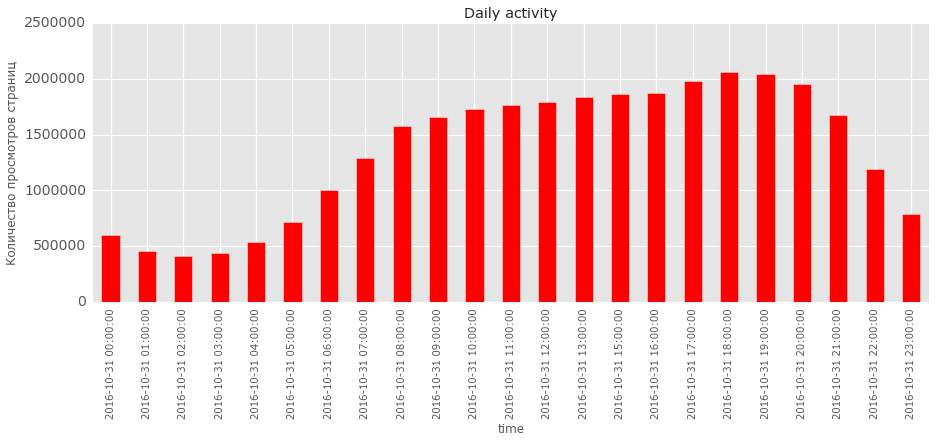

In [317]:
df.dtypes

daily = df[["time","counter"]].groupby("time").sum()
pl = daily.plot(kind='bar', color='r', title = u'Daily activity', legend=False)
pl.set_ylabel(u'Количество просмотров страниц')

## 3. Сравнение результатов просмотра страниц

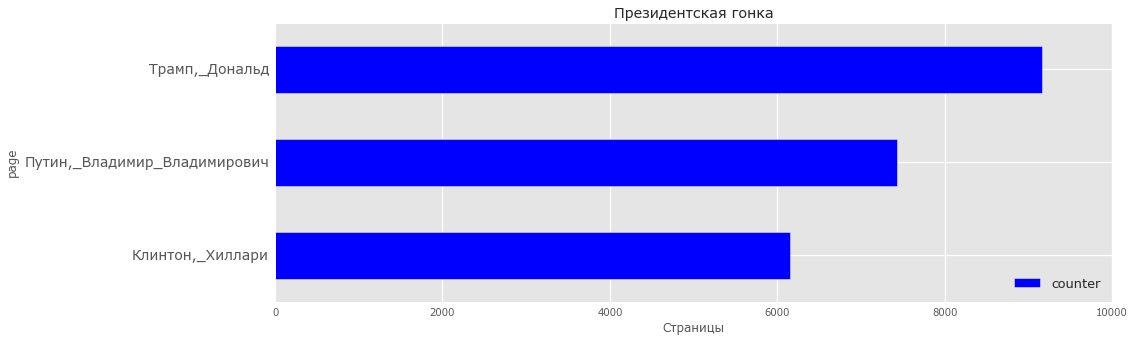

In [316]:

usa_votes = df[(df['page'] == 'Клинтон,_Хиллари')
               | (df['page'] == 'Трамп,_Дональд')
               | (df['page'] == 'Путин,_Владимир_Владимирович')]

usa_votes = usa_votes[['time', 'page', 'counter']].groupby(['page']).sum()
pl = usa_votes.plot.barh(title=u'Президентская гонка')
pl.set_xlabel(u'Количество просмотров')
pl.set_xlabel(u'Страницы')
#pd.pivot_table(usa_votes, index=["dtm"], columns=['page'], values=["counter"], aggfunc=np.sum)


## 4. TOP 30 самых посещаемых страниц за сутки

In [319]:
top50 = df[['date', 'page', 'counter']].groupby(['date', 'page']).sum()
top50 = top50.nlargest(30, 'counter')
top50.columns = [ 'pageview']

top50

pageview
date       page                                                
2016-10-31 Заглавная_страница                           1368877
           Зельдин,_Владимир_Михайлович                  433069
           Служебная:Поиск                               176623
           Хеллоуин                                      150875
           -                                              98019
           Аксёнов,_Василий_Павлович                      71449
           Евтушенко,_Евгений_Александрович               48116
           Шиманская,_Марина_Мечиславовна                 46855
           Ахмадулина,_Белла_Ахатовна                     42724
           Островская,_Генриетта_Тимофеевна               25444
           Президентские_выборы_в_США_(2016)              21765
           День_народного_единства                        20838
           Служебная:Свежие_правки                        19537
           Доктор_Стрэндж_(фильм,_2016)                   19508
           Катастрофа_A321_над_Синайским_полуостровом     19486
           Доктор_Стрэндж                                 18319
           Арлаускас,_Альгис_Иозасович                    17228
           Рождественский,_Роберт_Иванович                16360
           Special:Search                                 16179
           Ящур                                           15006
           Адмирал_Флота_Советского_Союза_Кузнецов        14707
           Служебная:Вход                                 14668
           Моисей                                         13803
           Служебная:Список_наблюдения                    13756
           Анненков,_Николай_Александрович                13568
           Гарри_Поттер                                   13322
           Россия                                         12870
           Свинарка_и_пастух                              12846
           31_октября                                     12703
           Этуш,_Владимир_Абрамович                       12517

## 5.Распределение количества cтраниц по количеству просмотров

In [ ]:
sql_query = """
select 
    pv page_view,
    count(*) as count_of_pages
from
(
    select page, sum(count) pv
    from pageview
    group by page
)
group by pv
"""